In [2]:
from PIL import Image

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import csv

## Creating a helper function to plot the graph and make GIFs

In [3]:
def save_gif_PIL (outfile, files, fps = 5, loop = 0):
    "Helper function for saving GIFs"
    imgs = [Image.open(file) for file in files]
    imgs[0].save(fp=outfile, format='GIF', append_images=imgs[1:], save_all=True, duration=int(1000/fps), loop=loop)
    
def plot_result (x, y, x_data, y_data, yh, xp=None):
    plt.figure(figsize=(16,8))
    plt.plot(x, y, color="grey", linewidth=2, alpha=0.8, label="Exact Solution")
    plt.scatter(x_data, y_data, s=60, color="tab:orange", alpha=0.4, label='Training data')
    plt.plot(x, yh, color="tab:blue", linewidth=4, alpha=0.8, label="Neural network prediction")
    l = plt.legend(loc=(1.01,0.34), frameon=False, fontsize="large")
    plt.setp(l.get_texts(), color="k")
    plt.yticks([x*0.05 for x in range(-2, 8)])
    plt.axis("off")

## Creating neural network class

In [4]:
class Neural_net(nn.Module):
    
    def __init__(self, n_input, n_output, n_hidden, n_layers):
        super().__init__()
        activation = nn.Tanh
        self.input_hidden = nn.Sequential(
                         nn.Linear(n_input, n_hidden),
                         activation())
        
        self.hidden_hidden = nn.Sequential(*[nn.Sequential(*[
            nn.Linear(n_hidden, n_hidden),
            activation()
        ]) for _ in range(n_layers - 1)])
        
        self.hidden_output = nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = self.input_hidden(x)
        x = self.hidden_hidden(x)
        x = self.hidden_output(x)
        return x

In the above example `Neural_net` class inherits nn.Module class in Pytorch.
The **contructor** of the `Neural_net` class takes the following arguments:
* `n_input` - the number of input nodes

* `n_output` - the number of output nodes

* `n_hidden` - the number of nodes in the hidden layer

* `n_layers` - the number of hidden layers in the neural network

**Activation** function used: _tanh_

### Loading the datapoints the data

In [5]:
with open ('Series RLC Circuit.csv') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 1
    x = []
    y = []
    for row in csv_reader:
        
        if line_count == 20001:
            break

        elif line_count % 40 == 0:
            x.append([float(row[0])])
            y.append([float(row[1])])
        line_count += 1

print(f"The length of x is {len(x)}")
print(f"The length of y is {len(y)}")

The length of x is 500
The length of y is 500


The above code uploads all of the _data points_ to display the _graph_ of the function (i.e. solution of the differential equation).
The data is loaded to `data_x` and `data_y` lists.

### Plotting the graph of the function (i.e. solution)

Length of x_data: 20
Length of y_data: 20


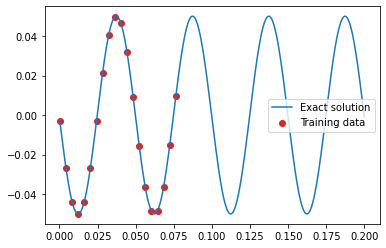

In [6]:
x_data = x[0:200:10]
y_data = y[0:200:10]
print(f"Length of x_data: {len(x_data)}\nLength of y_data: {len(y_data)}")

x_data = torch.Tensor(x_data)
y_data = torch.Tensor(y_data)

x = torch.Tensor(x)
y = torch.Tensor(y)

plt.figure()
plt.plot(x, y, label = "Exact solution")
plt.scatter(x_data, y_data, color="tab:red", label="Training data")
plt.legend()
plt.show()

In the above graph:
* Data shown in **blue** is the **solution** of the differential equation which we do **not** use during the **training process**
* **Red** data points is the training data.

### Traditional Training of the neural network

In this section we train the neural network based in a standard way using the 20 (x_data and y_data) data points selected.

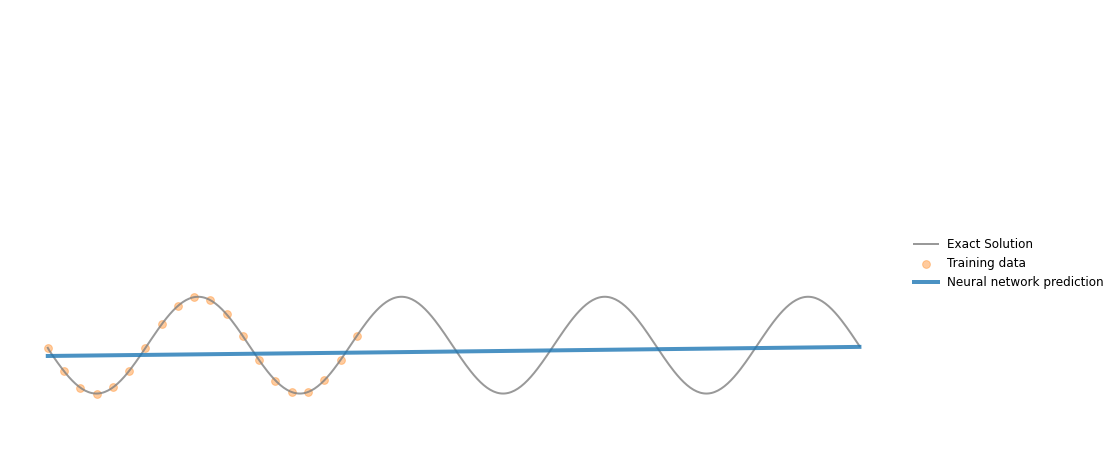

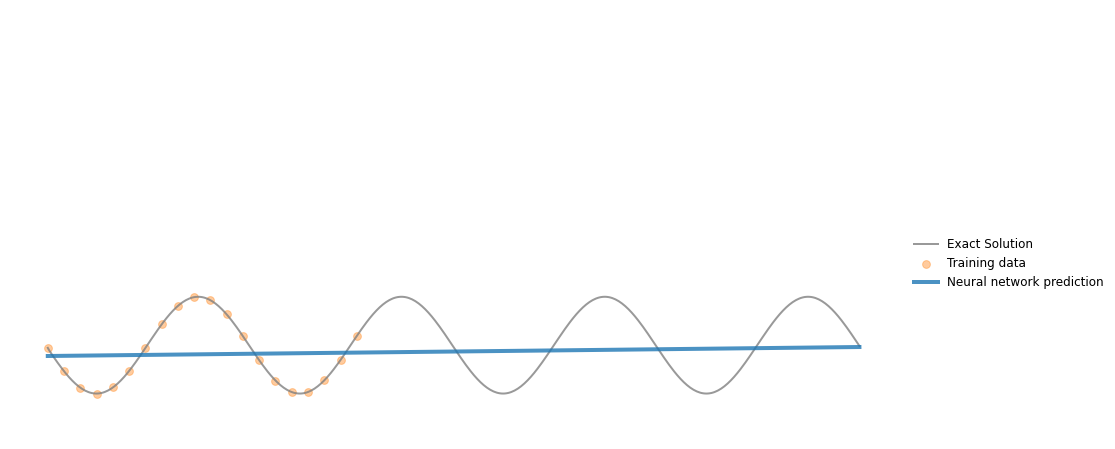

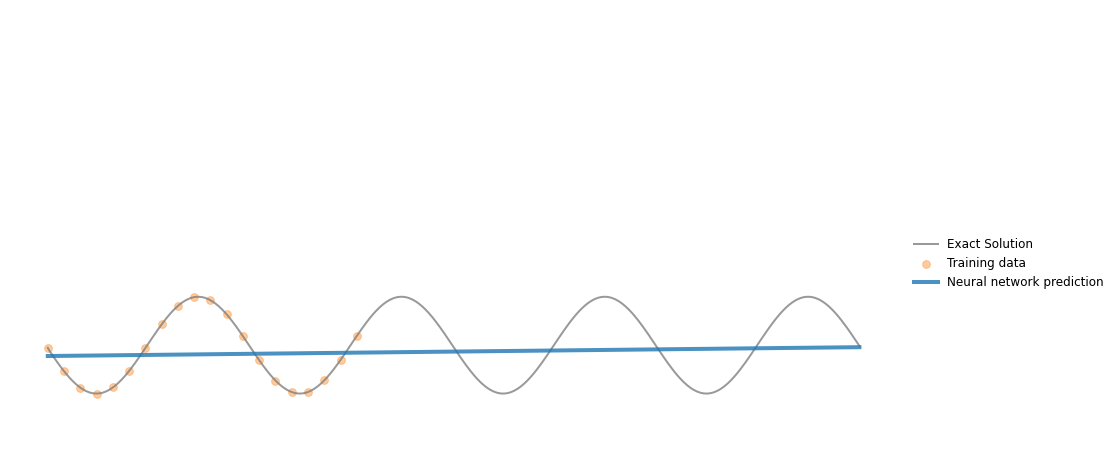

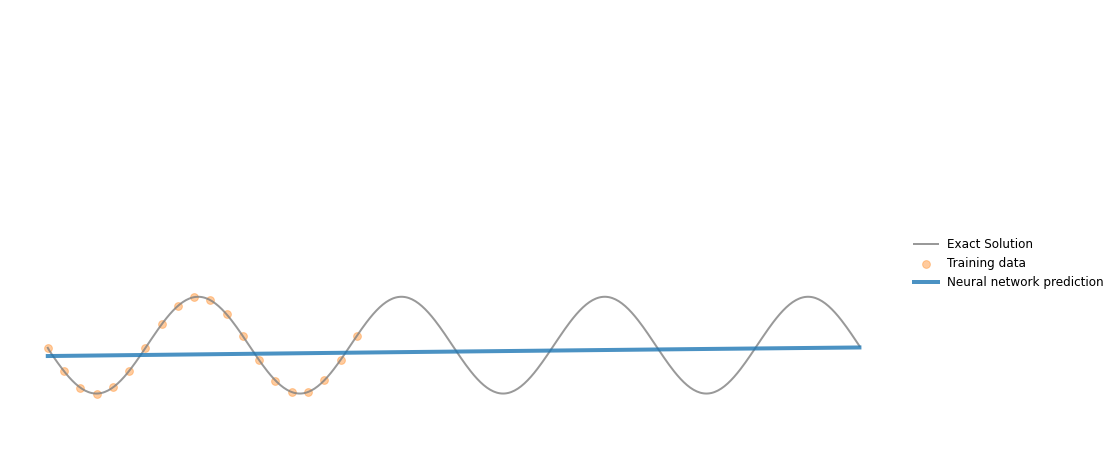

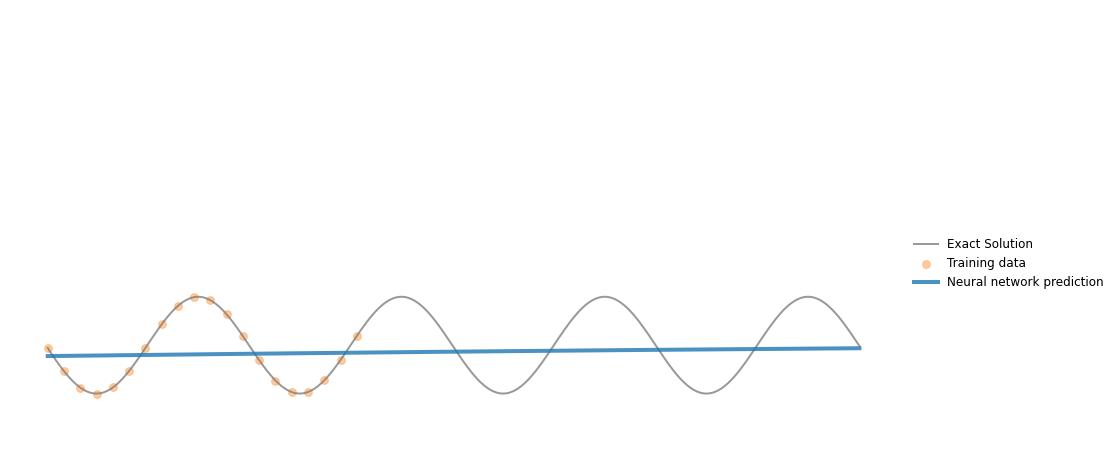

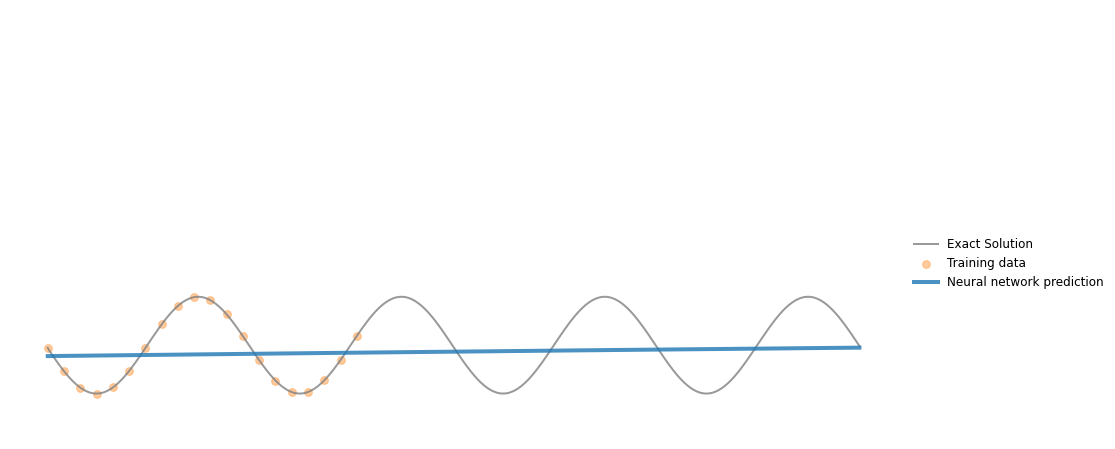

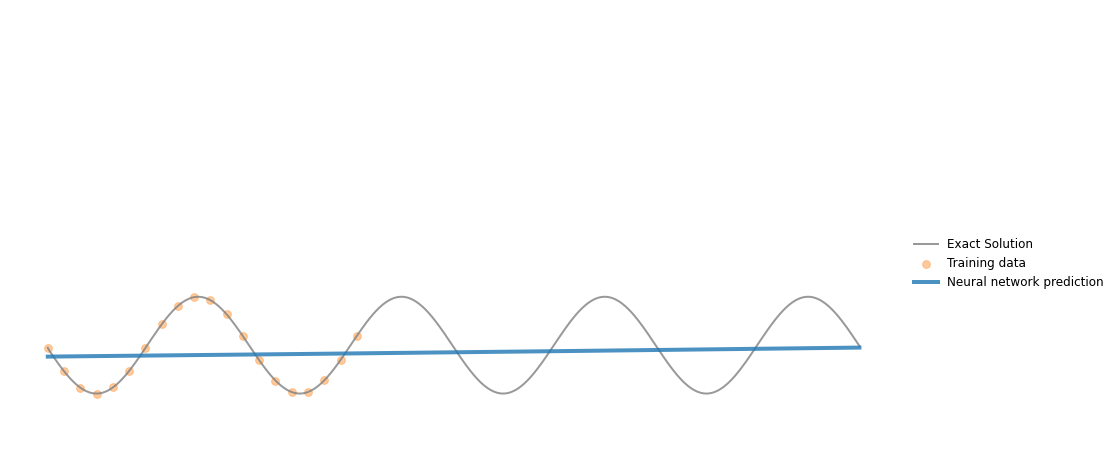

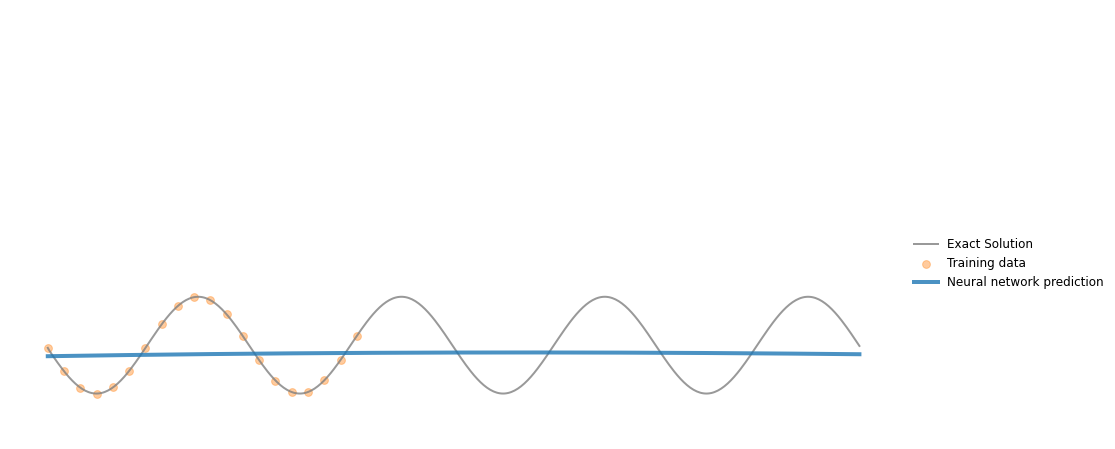

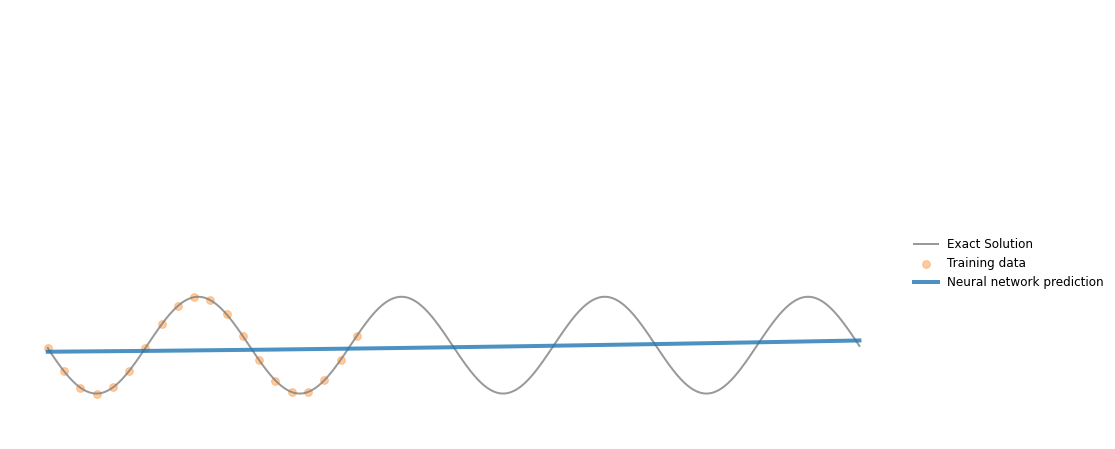

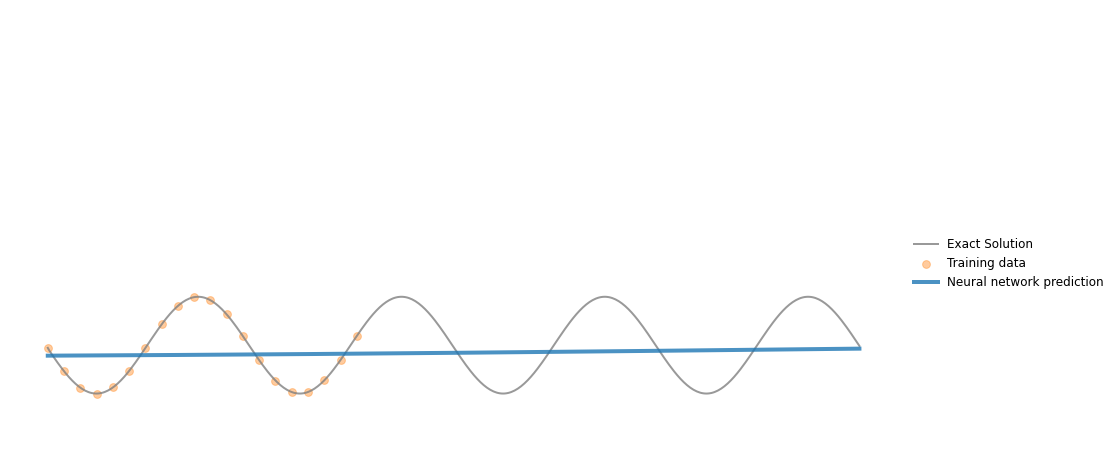

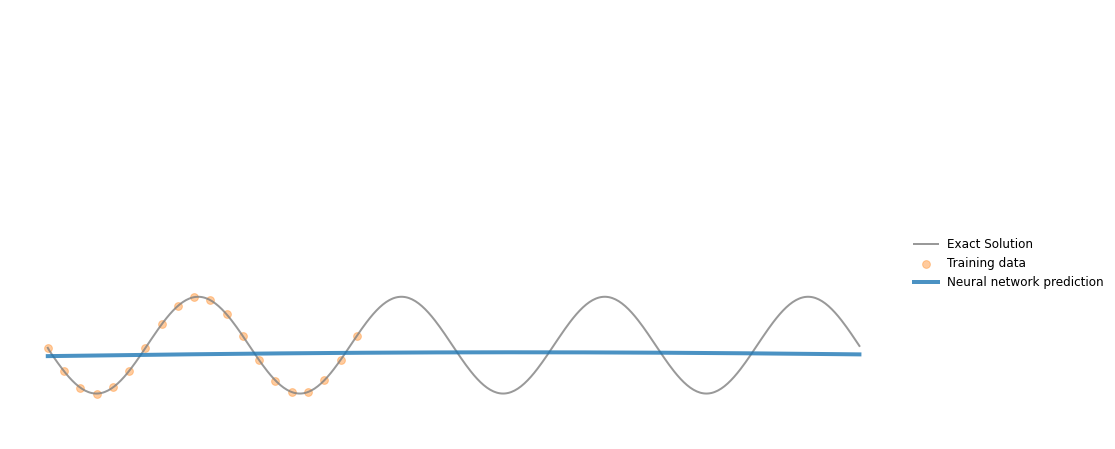

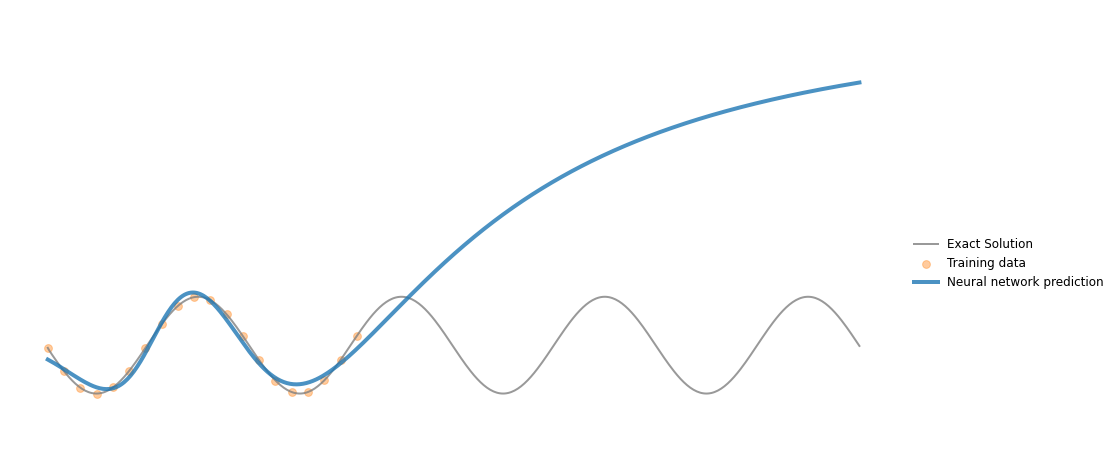

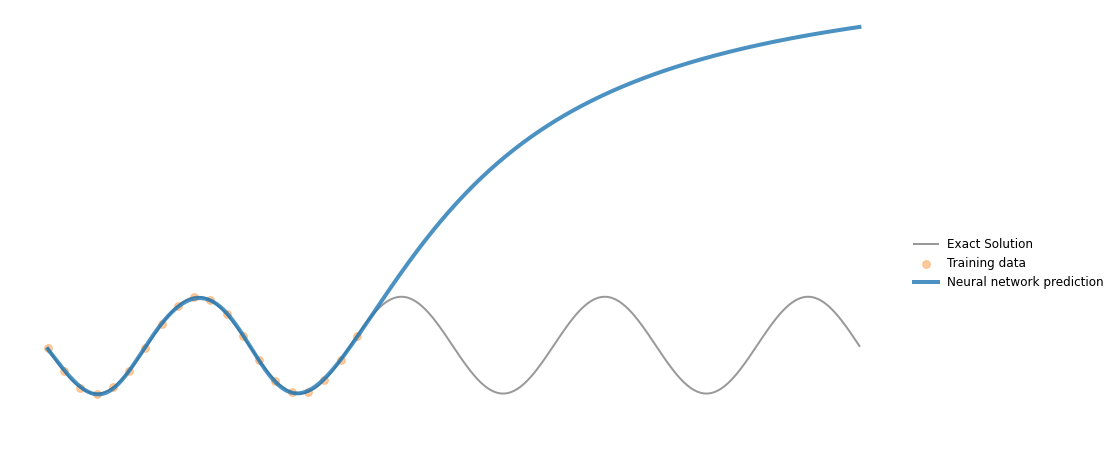

In [9]:
torch.manual_seed(123)
model = Neural_net(1, 1, 32, 3)
optimizer = torch.optim.Adam(model.parameters(), lr=5e-3)
files = []

for i in range(6501):
    optimizer.zero_grad()
    yh = model(x_data)
    loss = torch.mean((yh-y_data)**2)
    loss.backward()
    optimizer.step()
    
    
    if (i+1) % 50 == 0:
        
        yh = model(x).detach()
        
        plot_result(x,y,x_data,y_data, yh)
        
        file = "plots/nn_%.8i.png"%(i+1)
        plt.savefig(file, bbox_inches='tight', pad_inches=0.1, dpi=100, facecolor="white")
        files.append(file)
        
        if (i+1) % 500==0: plt.show()
        else: plt.close("all")

In [11]:
save_gif_PIL("nn.gif", files, fps=20, loop=0)